In [115]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

In [62]:
def combine_deep(sfq, mass_bin, z, mode='count'):
    radial_COSMOS = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'COSMOS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'.npy')
    radial_DEEP = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'DEEP_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'.npy')
    radial_SXDS = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'SXDS_uddd_'+sfq+'_'+mass_bin+'_'+str(z)+'.npy')
    radial_ELAIS = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'ELAIS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'.npy')
    radial_XMM = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'XMM-LSS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'.npy')
    
    radial_COSMOS_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'COSMOS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'_err.npy')
    radial_DEEP_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'DEEP_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'_err.npy')
    radial_SXDS_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'SXDS_uddd_'+sfq+'_'+mass_bin+'_'+str(z)+'_err.npy')
    radial_ELAIS_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'ELAIS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'_err.npy')
    radial_XMM_err = np.load('CUT_deep_catalogs/split_sfq_mass_data/'+mode+'XMM-LSS_deep_'+sfq+'_'+mass_bin+'_'+str(z)+'_err.npy')
    
    if z==0.6:
        radial_total = (radial_COSMOS*598+radial_XMM*467+radial_ELAIS*401+radial_SXDS*178+radial_DEEP*446)/(598.+467+401+178+446)
        radial_total_err = np.sqrt(radial_COSMOS_err**2*598**2+radial_XMM_err**2*467**2+radial_ELAIS_err**2*401**2+radial_SXDS_err**2*178**2+radial_DEEP_err**2*446**2)/(598.+467+401+178+446)
    elif z==0.3:
        radial_total = (radial_COSMOS*316+radial_XMM*247+radial_ELAIS*228+radial_SXDS*92+radial_DEEP*189)/(316.+247+228+92+189)
        radial_total_err = np.sqrt(radial_COSMOS_err**2*316**2+radial_XMM_err**2*247**2+radial_ELAIS_err**2*228**2+radial_SXDS_err**2*98**2+radial_DEEP_err**2*198**2)/(316.+247+228+92+189)
    else:
        radial_total = 0
        radial_total_err = 0
                               
    return radial_total, radial_total_err

In [66]:
pwd

u'/home/lejay/research/Winter_2018'

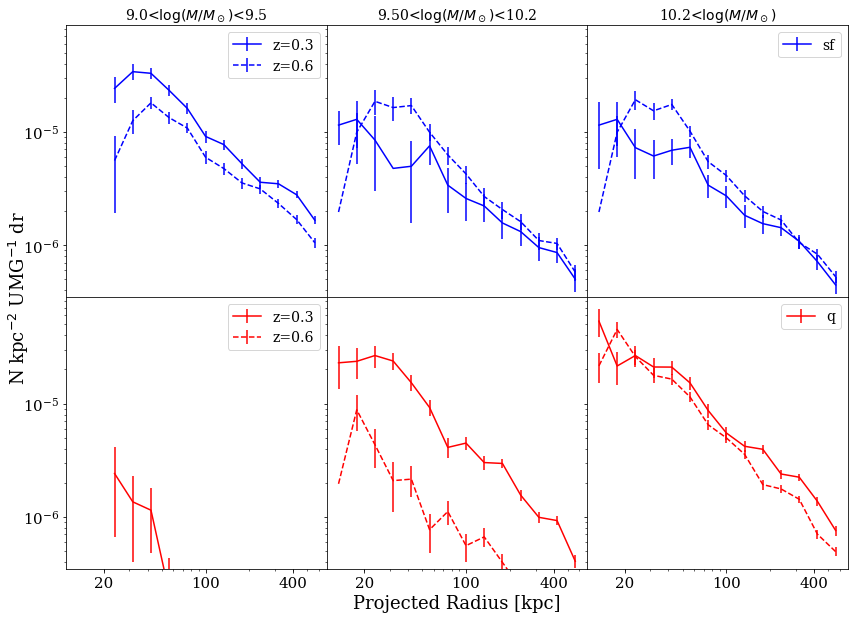

In [125]:
t = np.arange(0.0, 2.0, 0.01)

s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = s1 * s2

radial_3_sf_l = combine_deep('sf','9.0',0.3)
radial_3_sf_m = combine_deep('sf','9.5',0.3)
radial_3_sf_h = combine_deep('sf','10.2',0.3)
radial_3_q_l = combine_deep('q','9.0',0.3)
radial_3_q_m = combine_deep('q','9.5',0.3)
radial_3_q_h = combine_deep('q','10.2',0.3)
radial_6_sf_l = combine_deep('sf','9.0',0.6)
radial_6_sf_m = combine_deep('sf','9.5',0.6)
radial_6_sf_h = combine_deep('sf','10.2',0.6)
radial_6_q_l = combine_deep('q','9.0',0.6)
radial_6_q_m = combine_deep('q','9.5',0.6)
radial_6_q_h = combine_deep('q','10.2',0.6)

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(14, 10))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
bin_edges = np.load('bin_edges.npy')
# Plot each graph, and manually set the y tick values
axs[0][0].errorbar(bin_edges[1:], radial_3_sf_l[0], yerr=radial_3_sf_l[1], fmt='b',label='z=0.3')
axs[0][0].errorbar(bin_edges[1:], radial_6_sf_l[0], yerr=radial_6_sf_l[1], fmt='--b',label='z=0.6')

axs[0][0].set_title(r'9.0<$\log(M/M_\odot)$<9.5',fontsize=14)
axs[0][0].set_xlabel('Projected Radius [kpc]', fontsize=14)
axs[0][0].legend(fontsize=14)

axs[0][1].errorbar(bin_edges[1:], radial_3_sf_m[0], yerr=radial_3_sf_m[1], fmt='b')
axs[0][1].errorbar(bin_edges[1:], radial_6_sf_m[0], yerr=radial_6_sf_m[1], fmt='--b')
axs[0][1].set_xlabel('Projected Radius [kpc]', fontsize=14)
axs[0][1].set_title(r'9.50<$\log(M/M_\odot)$<10.2',fontsize=14)

axs[0][2].errorbar(bin_edges[1:], radial_3_sf_h[0], yerr=radial_3_sf_h[1],fmt='b',label='sf')
axs[0][2].errorbar(bin_edges[1:], radial_6_sf_h[0], yerr=radial_6_sf_h[1],fmt='--b')
axs[0][2].set_title(r'10.2<$\log(M/M_\odot)$',fontsize=14)
axs[0][2].legend(fontsize=14)

axs[1][0].errorbar(bin_edges[1:], radial_3_q_l[0], yerr=radial_3_q_l[1],fmt='r',label='z=0.3')
axs[1][0].errorbar(bin_edges[1:], radial_6_q_l[0], yerr=radial_6_q_l[1],fmt='--r',label='z=0.6')
axs[1][0].legend(fontsize=14)

axs[1][1].errorbar(bin_edges[1:], radial_3_q_m[0], yerr=radial_3_q_m[1],fmt='r')
axs[1][1].errorbar(bin_edges[1:], radial_6_q_m[0], yerr=radial_6_q_m[1],fmt='--r')


axs[1][2].errorbar(bin_edges[1:], radial_3_q_h[0], yerr=radial_3_q_h[1],fmt='r',label='q')
axs[1][2].errorbar(bin_edges[1:], radial_6_q_h[0], yerr=radial_6_q_h[1],fmt='--r')
axs[1][2].legend(fontsize=14)

axs[0][0].set_yscale('log')
axs[0][0].set_xscale('log')
axs[0][0].set_xticks([20, 100, 400])
axs[0][0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('Projected Radius [kpc]', fontsize=18)
plt.ylabel(r'N kpc$^{-2}$ UMG$^{-1}$ dr',fontsize=18)
plt.savefig('splitting.png')
plt.show()

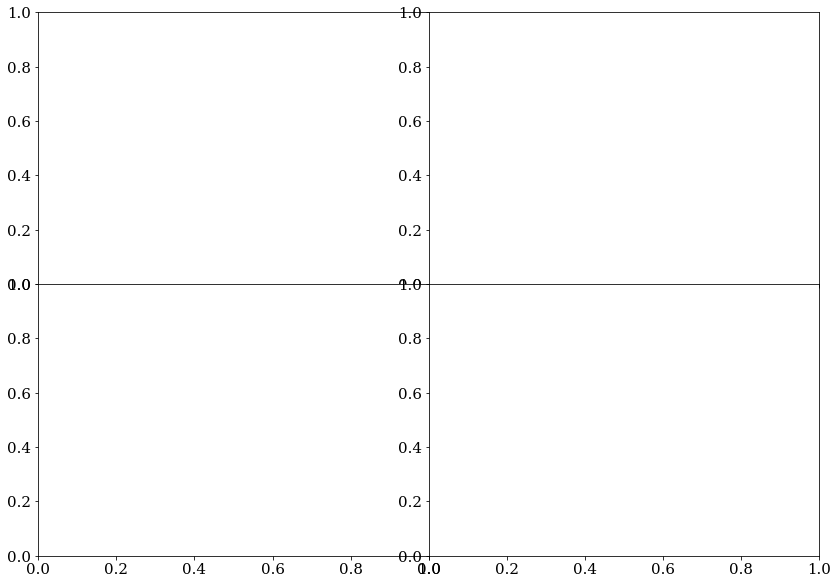

In [120]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(14, 10))
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.show()